# Partie 1: Arbre en liste imbriquée
L'arbre suivant est représenté par une liste imbriquée (ou plutôt un tuple imbriqué): 

```arbre = ('r',('a',('c',None,None),('d',None,None)),('b',('e',None,None),('f',None,None)))```

> **Questions:** aidez vous de la cellule suivante pour explorer cette structure de données: A quoi correspondent `arbre[0]`, `arbre[1][0]`, `arbre[1][1]`?




In [ ]:
arbre = ('r',('a',('c',None,None),('d',None,None)),('b',('e',None,None),('f',None,None)))
arbre[0]

'r'

## Dessiner l'arbre
La librairie chargée contient la fonction `hierarchy_pos` pour la représentation graphique de cet arbre.

On pourra adapter le script suivant lorsque l'on souhaitera tracer le dessin d'un arbre:


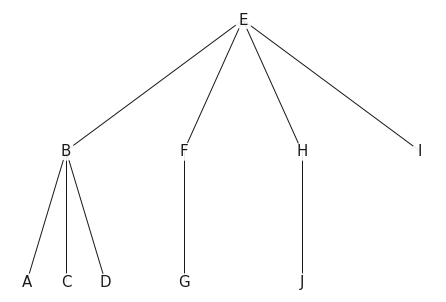

In [ ]:
from hierarchyP import hierarchy_pos
import matplotlib.pyplot as plt
import networkx as nx
G=nx.Graph()
G.root = 0
# G est une instance de la classe Graph
L = [("E","B"),("E","F"), ("E","H"), ("E","I"),("B","A"), ("B","C"), ("B","D"), ("F","G"), ("H","J"),("B","E")]
# L représente la liste des branches de l'arbre. C'est une liste de tuples que l'on adaptera selon l'arbre.
racine = "E"
# racine stocke la clé correspondant à la racine de l'arbre (ici, c'est "E")
G.add_edges_from(L)
pos3 = hierarchy_pos(G,racine)

nx.draw(G, pos=pos3, with_labels=True, font_size=15, font_family='sans-serif', node_color='white',alpha=0.9)

plt.show()

> **Travail:** completer le script de la fonction `branches`, qui, à partir d'une liste (ou tuple) imbriquée, construit une liste de branches.

In [ ]:
def branches(a, L=[]):
    """
    L : list de tuples (clé père, clé fils)
    a: list imbriquée: contient l'arbre
    un noeud : tuple (cle,fils gauche,fils droit)
    a[O]: clé
    a[1]: noeud fils gauche
    a[1][0]: clé du fils gauche
    ... 
    """
    if a is None:
        return []
    else:
        if not a[1] is None:
            L.append((a[0],a[1][0]))
            branches(a[1],L)
        if not a[2] is None:
            # à completer
            L.append((a[0],a[2][0]))
            branches(a[2],L)
    return L



In [ ]:
branches(arbre,[])

[('r', 'a'), ('a', 'c'), ('a', 'd'), ('r', 'b'), ('b', 'e'), ('b', 'f')]

> **Travail:** adapter le script pour tracer l'`arbre` à partir de sa liste de branches.

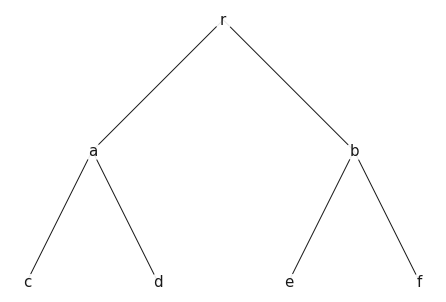

In [ ]:
G=nx.Graph()
G.root = 0
# G est une instance de la classe Graph
L = branches(arbre)
# L représente la liste des branches de l'arbre. C'est une liste de tuples que l'on adaptera selon l'arbre.
racine = "r"
# racine stocke la clé correspondant à la racine de l'arbre (ici, c'est "E")
G.add_edges_from(L)
pos3 = hierarchy_pos(G,racine)

nx.draw(G, pos=pos3, with_labels=True, font_size=15, font_family='sans-serif', node_color='white',alpha=0.9)

plt.show()

## Parcours infixe
> **Travail:** à l'aide de la fonction suivante: Afficher le parcours infixe de l'`arbre`.

In [ ]:
def parcours_infixe(a):
    if a is None:
        return([])
    else:
        return parcours_infixe(a[1]) + [a[0]] + parcours_infixe(a[2])

parcours_infixe(arbre)

['c', 'a', 'd', 'r', 'e', 'b', 'f']

**Travail:** Adapter ce script pour permettre les parcours *postfixe*, puis *prefixe* de cet arbre.

# Partie 2: Graphe représenté par un dictionnaire
Les clés du dictionnaire représentent les sommets parents, et la liste de valeurs associées seront les sommets adjacents.

G est un exemple d'un tel dictionnaire:

In [ ]:
G = dict()
G['a'] = ['b','c']
G['b'] = ['c','d'] 
G['c'] = ['e','i']
G['d'] = ['f','g'] 
G['e'] = ['h',None]
G['f'] = [None,None]
G['g'] = [None,None]
G['h'] = [None,None] 

G

{'a': ['b', 'c'],
 'b': ['c', 'd'],
 'c': ['e', 'i'],
 'd': ['f', 'g'],
 'e': ['h', None],
 'f': [None, None],
 'g': [None, None],
 'h': [None, None]}

On souhaite créer une **matrice** pour représenter cet arbre. Pour cela, on parcourt les clés du dictionnaire. Et les valeurs de ces clés. On construit une liste d'adjacence où l'on met 1 lorsque deux noeuds sont liés, et 0 sinon.

> **Travail:** Completez le script de la fonction `matrice` qui créé une matrice à partir du dictionnaire. Vous devez obtenir la matrice suivante lorsque vous testez votre fonction avec `G`:

```
[[0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]
 ``` 
 

In [ ]:
def matrice(dictionnaire):
    """
    créé une matrice à partir d'un dictionnaire
    Params:
    -------
    dictionnaire: dict, represente le graphe
    les clés sont les sommets
    les valeurs sont les listes de sommets liés à la clé
    Variables:
    ----------
    row: list, contient des 0 ou 1
    M: matrice d'adjacence
    cles: list, contient les etiquettes des sommets de maniere unique
        exemple: ['a','b','c'...]
    """
    
    cles = list(dictionnaire.keys())
    n = len(cles)
    M = [[0]*n for loop in range(n)]
    for i in range(len(cles)):
        for j in range(len(cles)):
            
            liste_sommets = dictionnaire[cles[i]]
            # à compléter
            # si cles[j] est dans la liste_sommets: 
            # mettre 1 dans la matrice au niveau de la ligne i et de la colonne j
            if (cles[j] in liste_sommets) :
                
                M[i][j] = 1

    return M
        
matrice(G)

[[0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

# Partie 3: Arbre et programmation orientée objet
On donne la classe `ArbreBinaire` qui permettra de représenter l'arbre et de lui associer des méthodes.




> **Travail:** Ajouter les methodes de classe `set_value`, `set_FG` et `set_FD` qui vont permettre de modifier les valeurs des attributs (respectivement `cle`, `FilsGauche` et `FilsDroit`)

In [ ]:
class ArbreBinaire:
    def __init__(self,valeur):
        self.cle = valeur
        self.FilsGauche = None
        self.FilsDroit = None
        
    def set_value(self,value):
        self.cle = value
        
    def set_FG(self,FG):
        self.FilsGauche = FG
        
    def set_FD(self,FD):
        self.FilsDroit = FD
        
    def get_FG(self):
        return self.FilsGauche
    
    def get_FD(self):
        return self.FilsDroit
        
    def get_cle(self):
        return self.cle
    
    def compare(self,value):
        return not self.cle != value
        
    def recherche_iter(self,value):
        A = self
        while not A is None and A.cle != value:
            x = A.cle
            if value < x:
                A = A.FilsGauche
            else : 
                A = A.FilsDroit
        if A == None:
            return False
        else:
            return True
        
    def recherche_recur(self,value):
        if self is None:
            return False
        else:
            x = self.cle
            if x == value:
                return True
            elif value < x and self.FilsGauche:
                return self.FilsGauche.recherche_recur(value)
            elif value > x and self.FilsDroit: 
                return self.FilsDroit.recherche_recur(value)
            else : 
                return False
            
    def postfixe(self):
        if self is None:
            return
        if not self.FilsGauche is None:
            self.FilsGauche.postfixe()
        if not self.FilsDroit is None:
            self.FilsDroit.postfixe()
        print(self.cle)
        
    def infixe(self):
        if self is None:
            return
        if not self.FilsGauche is None:
            self.FilsGauche.infixe()
        print(self.cle)
        if not self.FilsDroit is None:
            self.FilsDroit.infixe()
            
    def prefixe(self):
        if self is None:
            return
        print(self.cle)
        if not self.FilsGauche is None:
            self.FilsGauche.prefixe()
        if not self.FilsDroit is None:
            self.FilsDroit.prefixe()

> **Travail:** Instancier les noeuds `racine`, `noeud1`, `noeud2`, ... pour représenter l'arbre de liste: 

```('r',('a',('c',None,None),('d',None,None)),('b',('e',None,None),('f',None,None)))```

In [ ]:
racine = ArbreBinaire('r')
noeud1 = ArbreBinaire('a')
noeud2 = ArbreBinaire('b')
noeud3 = ArbreBinaire('c')
noeud4 = ArbreBinaire('d')
noeud5 = ArbreBinaire('e')
noeud6 = ArbreBinaire('f')

racine.set_FG(noeud1)
racine.set_FD(noeud2)
noeud1.set_FG(noeud3)
noeud1.set_FD(noeud4)
noeud2.set_FG(noeud5)
noeud2.set_FD(noeud6)

## Parcours de l'arbre en programmation objet
La méthode de parcours infixe est donnée ci-dessous:

```
def infixe(self):
        if self is None:
            return
        if not self.FilsGauche is None:
            self.FilsGauche.infixe()
        print(self.cle)
        if not self.FilsDroit is None:
            self.FilsDroit.infixe()
```

Cette methode affiche les noeuds visités selon la méthode *infixe*.

> **Travail:** Ajouter cette méthode à la classe `ArbreBinaire`. Puis testez la pour afficher le parcours infixe de cet arbre. (utiliser la même cellule que celle où vous avez instancié l'arbre).

> **Travail:** Adapter cette méthode pour créer celles de parours `postfixe`, et `prefixe`.


## Un exemple d'arbre binaire de recherche (ABR)
ABR signifie arbre binaire de recherche. C'est un arbre binaire particulier qui est construit de telle sorte que le noeud fils gauche est toujours plus petit que son noeud parent. (Et le fils droit est toujours supérieur).

Vous allez créer un nouvel arbre binaire sur le modèle de celui vu en exercices (page 2):

```
abr = (8,(3,(1,None,None),(6,(4,None,None),(7,None,None))),(10,None,(14,(13,None,None),None)))
```

> **Travail:** Instancier l'arbre `abr` à l'aide de la classe `ArbreBinaire` comme vu plus haut.



In [ ]:
racineABR = ArbreBinaire(8)
noeud1 = ArbreBinaire(3)
noeud2 = ArbreBinaire(10)
noeud3 = ArbreBinaire(1)
noeud4 = ArbreBinaire(6)
noeud5 = ArbreBinaire(14)
noeud6 = ArbreBinaire(4)
noeud7 = ArbreBinaire(7)
noeud8 = ArbreBinaire(13)


racineABR.set_FG(noeud1)
racineABR.set_FD(noeud2)
noeud1.set_FG(noeud3)
noeud1.set_FD(noeud4)
noeud2.set_FD(noeud5)
noeud4.set_FG(noeud6)
noeud4.set_FD(noeud7)
noeud5.set_FG(noeud8)

def branches(a,L=[]):
    if a is None:
        return []
    else:
        if not a[1] is None:
            L.append((a[0],a[1][0]))
            branches(a[1],L)
        if not a[2] is None:
            L.append((a[0],a[2][0]))
            branches(a[2],L)
    return L

abr = (8,(3,(1,None,None),(6,(4,None,None),(7,None,None))),(10,None,(14,(13,None,None),None)))
L2 = branches(abr)
L2

[(8, 3), (3, 1), (3, 6), (6, 4), (6, 7), (8, 10), (10, 14), (14, 13)]

> **Travail:** Utiliser la fonction `branches(abr)` pour générer une liste de branches. Puis tracer l'arbre avec la fonction `hierarchy_pos`.

(8, 3)
(3, 1)
(3, 6)
(6, 4)
(6, 7)
(8, 10)
(10, 14)
(14, 13)


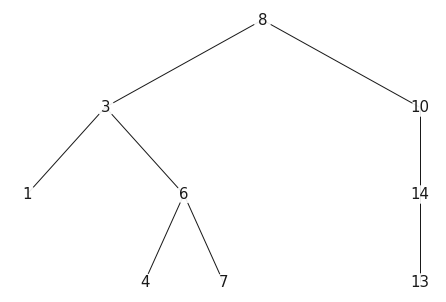

In [ ]:
G=nx.Graph()
G.root = 0
abr = (8,(3,(1,None,None),(6,(4,None,None),(7,None,None))),(10,None,(14,(13,None,None),None)))
L2 = []
L2 = branches(abr)
racine = 8
G.add_edges_from(L2)
pos3 = hierarchy_pos(G,racine)

nx.draw(G, pos=pos3, with_labels=True, font_size=15, font_family='sans-serif', node_color='white',alpha=0.9)

plt.show()

## Recherche dans un ABR
La méthode suivante permet d'effectuer une recherche dans un ABR de manière itérative (non recursive).

```
def recherche_iter(self,value):
        A = self
        while not A is None and A.cle != value:
            x = A.cle
            if value < x:
                A = A.FilsGauche
            else : 
                A = A.FilsDroit
        if A == None:
            return False
        else:
            return True
```

> **Travail:** Ajouter cette méthode à la classe `ArbreBinaire`. Executer à nouveau la cellule d'instancier de l'arbre `abr` (cellule precedente). Et tester l'eventuelle présence dans cet arbre du nombre **13**, puis du nombre **15**.


In [ ]:
racineABR.recherche_iter(13)

True

In [ ]:
racineABR.recherche_iter(15)

False

## Algorithme de recherche récursif

Voici l'algorithme de recherche reecursif dans un *ABR*:

```
fonction recherche_recur(A,v):
        Si A est Vide
          retourne Faux
        Sinon
          x = A.cle
          Si x == v
            retourner Vrai
          Sinon si v < x ET A.FilsGauche non Vide
            retourner A.FilsGauche.recherche_recur(v)
          Sinon si v > x ET A.FilsDroit non vide
            retourner A.FilsDroit.recherche_recur(v)
          Sinon
            retourner Faux
```


> **Travail:** Adapter cet algorithme pour écrire la méthode de classe `recherche_recur`, que vous ajouterez à la classe `ArbreBinaire`. Testez cette méthode avec certaines valeurs, presentes ou non dans l'arbre.


In [ ]:
racineABR.recherche_recur(13)

True

In [ ]:
racineABR.recherche_recur(15)

False